# <span style="color: blue;">ให้กรอกรหัสนิสิต และชื่อ-นามสกุล</span>

## รหัสนิสิต ชื่อ-นามสกุล
<span style="color: green;">6714450249 นายหรินทร์ ธนะนาม</span>

## สร้างและเทรนโมเดล CNN เพื่อจำแนกภาพ

### รูปภาพที่ให้มามี 4 คลาส โดยมีหมายเลขและชื่อคลาสดังนี้
<ol start="0" style="font-size: 18px">
<li>airplane
<li>automobile
<li>ship
<li>truck
</ol>

In [1]:
import time, datetime
import requests, pickle
import numpy as np
from tensorflow import keras
from IPython import display

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os

os.environ['TF_DETERMINISTIC_OPS'] = '1'
# os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

# os.environ['CUDA_VISIBLE_DEVICES'] = '-1'  # uncomment to Disable GPU training

In [3]:
import random, tensorflow as tf

def set_seed(seed_value=12345):
    random.seed(seed_value)
    np.random.seed(seed_value)
    tf.random.set_seed(seed_value)
    os.environ['PYTHONHASHSEED'] = str(seed_value)

In [4]:
print('Default GPU Device:', tf.test.gpu_device_name() or 'None')

Default GPU Device: /device:GPU:0


In [11]:
# class_names = ['.', '..', '...', '....']
class_names = ['airplane', 'automobile', 'ship', 'truck']

(_X_train, _y_train, _X_test, _y_test) = pickle.load(open('564_midterm_data_68.pkl', "rb"))

### ดูรูปภาพในชุดข้อมูล

In [12]:
def show_images(X, y, class_names, n_rows=3, n_cols=8, figsize=(9, 4)):
    fig = plt.figure(figsize=figsize)
    for i in range(0, n_rows):
        for j in range(0, n_cols):
            idx = i*n_cols + j
            image = X[idx]
            label = class_names[y[idx][0]]        
            ax = plt.subplot(n_rows, n_cols, idx+1)
            plt.imshow(image)
            plt.text(16, 36, str(y[idx]) + ' - ' + label, ha='center')
            plt.axis('off')
    plt.tight_layout()
    plt.show()

[2] ship


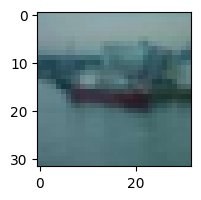

In [13]:
print(_y_test[1], class_names[_y_test[1][0]])
plt.figure(figsize=(2, 2))
plt.imshow(_X_test[1])

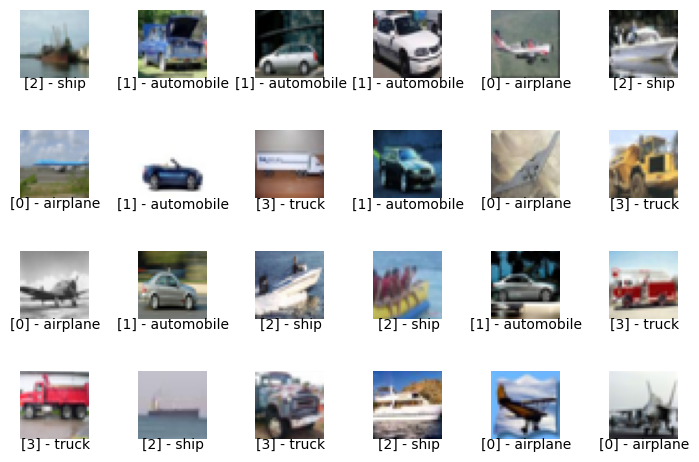

In [14]:
show_images(_X_train, _y_train, class_names, 4, 6, figsize=(7, 5))

<style> h3 { margin-top: 0.5em !important; margin-bottom: 0.0em; }
        h4 { margin-top: 0.1em !important; margin-bottom: 0.1em; }
        h5 { margin-top: 0.0em; margin-bottom: 0.2em; } </style>

# <span style="color:blue">โจทย์คำถาม</span>
* ### เพื่อป้องกันผลกระทบจาก randomness ให้นิสิตใช้ค่า seed เป็น 12345 ในทุกกรณีที่เกี่ยวข้องกับการสุ่ม และให้เรียกใช้ฟังก์ชัน set_seed(12345) ทุกครั้งก่อนที่จะสร้างโมเดล
* ### ให้แยกคำตอบของแต่ละข้อออกเป็นสัดส่วนที่ชัดเจน โดยใช้ markdown หรือ heading เพื่อระบุว่าคำตอบใน cell นั้นเป็นของโจทย์ข้อใด

## <span style="color:blue"> 1. (10 คะแนน) ให้แบ่งชุดข้อมูล test ออกเป็น 2 ส่วนในอัตราส่วน 80:20 และข้อมูลทั้ง 2 ส่วนนี้ให้แต่ละคลาสมีจำนวนข้อมูลเท่ากัน โดยข้อมูลที่ถูกแบ่งให้เก็บอยู่ในชุดข้อมูลที่เป็น test และ val ตามลำดับ หลังจากที่แบ่งข้อมูลเสร็จ ให้แสดงจำนวนข้อมูลของแต่ละคลาสในทั้งชุดข้อมูล train, val, และ test</span>

In [19]:
# _X_train, _y_train, _X_test, _y_test
# Check data sample
print('_X_train shape:', _X_train.shape)
print(_X_train.shape[0], 'train samples')
print(_X_test.shape[0], 'test samples')

_X_train shape: (10000, 32, 32, 3)
10000 train samples
2000 test samples


In [20]:
# Shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = (_X_train, _y_train), (_X_test, _y_test)
print('x_train shape:', _X_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (10000, 32, 32, 3)
10000 train samples
2000 test samples


In [ ]:
set_seed(12345)

# Split train data set into 2 part 90:10
from sklearn.model_selection import train_test_split
x_train_split, x_val_split, y_train_split, y_val_split = train_test_split(
    x_train,
    y_train,
    test_size=0.2,                              # 90% train, 10% validation
    random_state=12345,                         # Force same result every time
    stratify=y_train                            # Make sure every class have same ratio (Benefit for 1x1 dimension array not for matrix array)
)

In [26]:
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print('--------------------------------')
print('x_train_split size:', x_train_split.shape[0])
print('x_test_split size:', x_val_split.shape[0])
print('y_train_split size:', y_train_split.shape[0])
print('y_train_split size:', y_val_split.shape[0])

10000 train samples
2000 test samples
--------------------------------
x_train_split size: 8000
x_test_split size: 2000
y_train_split size: 8000
y_train_split size: 2000


## <span style="color:blue"> 2. (10 คะแนน) ให้ normalize ข้อมูลรูปภาพและทำ one-hot encoding ข้อมูลคลาสให้กับทุกชุดข้อมูล</span>

In [ ]:
# Normalize data
x_train_scale = x_train_split.astype('float32')
x_val_scale = x_val_split.astype('float32')
x_train_scale /= 255
x_val_scale /= 255


In [47]:
# One hot encode label
num_classes = 4
y_train_onehot = keras.utils.to_categorical(y_train_split, num_classes)
y_val_onehot = keras.utils.to_categorical(y_val_split, num_classes)

## <span style="color:blue"> 3. (40 คะแนน) ให้สร้างโมเดลด้วย CNN เพื่อให้ได้ accuracy ที่ดีที่สุด และ<span style="color:red">ห้ามใช้ Early Stopping, ห้ามใช้ Best Weights, ห้ามใช้ Data Augmentation และห้ามใช้โมเดล Pre-trained ในการเทรนโมเดล</span> โดยให้เทรนโมเดลเต็มจำนวน epoch ตามที่นิสิตกำหนด ซึ่งค่า epoch ต้องไม่น้อยกว่า 50 รอบและต้องหารด้วย 10 ลงตัว และหลังจากโมเดลถูกเทรนแล้วเสร็จ ให้แสดงค่า Accuracy และ Loss ที่วัดได้จากชุดข้อมูล train, val และ test</span>

<ul style="line-height:1.5; font-size: 18px;">
  <li style="list-style-type:none;"><span style="color:blue">เกณฑ์การให้คะแนนโมเดลที่เทรนได้</span></li>
  <li>(10 คะแนน) ค่า accuracy จากชุดข้อมูล test ไม่น้อยกว่า 0.70</li>
  <li>(20 คะแนน) ค่า accuracy จากชุดข้อมูล test ไม่น้อยกว่า 0.75</li>
  <li>(25 คะแนน) ค่า accuracy จากชุดข้อมูล test ไม่น้อยกว่า 0.80</li>
  <li>(30 คะแนน) ค่า accuracy จากชุดข้อมูล test ไม่น้อยกว่า 0.85</li>
  <li>(35 คะแนน) ค่า accuracy จากชุดข้อมูล test ไม่น้อยกว่า 0.87</li>
  <li>(40 คะแนน) ค่า accuracy จากชุดข้อมูล test ไม่น้อยกว่า 0.90</li>
</ul>

In [55]:
set_seed(12345)

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

# Initialize the model
model_1 = Sequential()

model_1.add(Conv2D(16, (5, 5), strides=(1, 1), padding='same',
                   input_shape=x_train.shape[1:], activation='relu', name='conv_1'))
model_1.add(Conv2D(32, (5, 5), strides=(1, 1), padding='same', activation='relu', name='conv_2'))
model_1.add(MaxPooling2D(pool_size=(2, 2), name='pool_1'))

model_1.add(Conv2D(64, (5, 5), strides=(1, 1), padding='same' , activation='relu', name='conv_3'))
model_1.add(Conv2D(128, (5, 5), strides=(1, 1), padding='same', activation='relu', name='conv_4'))
model_1.add(MaxPooling2D(pool_size=(2, 2), name='pool_2'))

model_1.add(Flatten(name='flatten_1'))
model_1.add(Dense(64, activation='relu', name='dense_1'))
model_1.add(Dense(num_classes, activation='softmax', name='output'))
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 32, 32, 16)        1216      
                                                                 
 conv_2 (Conv2D)             (None, 32, 32, 32)        12832     
                                                                 
 pool_1 (MaxPooling2D)       (None, 16, 16, 32)        0         
                                                                 
 conv_3 (Conv2D)             (None, 16, 16, 64)        51264     
                                                                 
 conv_4 (Conv2D)             (None, 16, 16, 128)       204928    
                                                                 
 pool_2 (MaxPooling2D)       (None, 8, 8, 128)         0         
                                                                 
 flatten_1 (Flatten)         (None, 8192)             

In [67]:
from tensorflow.keras.optimizers import Adam

model_1.compile(optimizer=Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])
run_hist_1 = model_1.fit(x_train_scale, y_train_onehot, validation_data=(x_val_scale, y_val_onehot), epochs=50, batch_size=32)

Epoch 1/50
250/250 [==============================] - 2s 7ms/step - loss: 0.0127 - accuracy: 0.9965 - val_loss: 1.0638 - val_accuracy: 0.8140
Epoch 2/50
250/250 [==============================] - 2s 6ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 1.0837 - val_accuracy: 0.8275
Epoch 3/50
250/250 [==============================] - 1s 6ms/step - loss: 5.4921e-04 - accuracy: 1.0000 - val_loss: 1.1300 - val_accuracy: 0.8250
Epoch 4/50
250/250 [==============================] - 2s 6ms/step - loss: 3.1042e-04 - accuracy: 1.0000 - val_loss: 1.1736 - val_accuracy: 0.8255
Epoch 5/50
250/250 [==============================] - 2s 6ms/step - loss: 2.2369e-04 - accuracy: 1.0000 - val_loss: 1.2075 - val_accuracy: 0.8260
Epoch 6/50
250/250 [==============================] - 1s 6ms/step - loss: 1.6912e-04 - accuracy: 1.0000 - val_loss: 1.2411 - val_accuracy: 0.8260
Epoch 7/50
250/250 [==============================] - 1s 6ms/step - loss: 1.3419e-04 - accuracy: 1.0000 - val_loss: 1.2679 - val_acc

In [70]:
loss_train, accuracy_train = model_1.evaluate(x_train_scale, y_train_onehot)
loss_val, accuracy_val = model_1.evaluate(x_val_scale, y_val_onehot)

print('Training Accuracy: {:.4f}'.format(accuracy_train))
print('Training Loss: {:.4f}'.format(loss_train))
print('Validation Accuracy: {:.4f}'.format(accuracy_val))
print('Validation Loss: {:.4f}'.format(loss_val))

63/63 [==============================] - 0s 3ms/step - loss: 2.1130 - accuracy: 0.8300
Training Accuracy: 1.0000
Training Loss: 0.0000
Validation Accuracy: 0.8300
Validation Loss: 2.1130


## <span style="color:blue"> 4. (40 คะแนน) ให้แสดงตารางภาพ Confusion Matrix และ Classification Report จากผลการทำนายของโมเดลด้วยชุดข้อมูล test และให้วิเคราะห์และอธิบายผลลัพธ์ที่ได้ในภาพรวม นอกจากนี้ให้พิจารณาคลาสที่มีค่า F1-score ต่ำสุด เพื่ออธิบายความหมายของค่า Precision และ Recall ของคลาสนั้นว่าบ่งบอกอะไรเกี่ยวกับความสามารถในการทำนายของโมเดล และให้เชื่อมโยงคำอธิบายกับข้อมูลที่ปรากฏใน Confusion Matrix เพื่อให้เห็นภาพชัดเจนยิ่งขึ้น</span>

63/63 [==============================] - 0s 6ms/step
              precision    recall  f1-score   support

    airplane       1.00      0.26      0.41      2000
  automobile       0.00      0.00      0.00         0
        ship       0.00      0.00      0.00         0
       truck       0.00      0.00      0.00         0

    accuracy                           0.26      2000
   macro avg       0.25      0.06      0.10      2000
weighted avg       1.00      0.26      0.41      2000



c:\Users\User\.conda\envs\dl_564\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\User\.conda\envs\dl_564\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\User\.conda\envs\dl_564\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


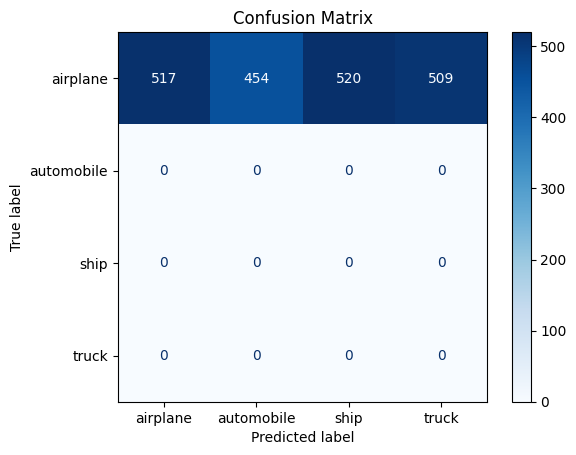

In [75]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred_1 = model_1.predict(x_test)
y_pred_classes_1 = np.argmax(y_pred_1, axis=1)
y_true_1 = np.argmax(y_test, axis=1)

print(classification_report(y_true_1, y_pred_classes_1, target_names=class_names))
confusion_matrix_1 = confusion_matrix(y_true_1, y_pred_classes_1)
display_matrix_1 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_1, display_labels=class_names)
display_matrix_1.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.show()